In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.polynomial import legendre as legendre_np
from scipy.special    import legendre as legendre_sc
from scipy.integrate  import quad
from scipy            import linalg   as la


# print(plt.style.available)
plt.style.use("seaborn-whitegrid")

## Legendre Polynomials

**Function that returns y=f(x) where f is the Legendre polynomials of degree n** 

In [2]:
def Legendre(x, n):
    """Set up a function defining Legendre Polynomials"""
    # calling the n_th deg of Legendre polynomials
    leg = legendre_sc(n)
    
    # getting the y = f(x)
    y = leg(x)
    return y

**Visualize the first five degree**

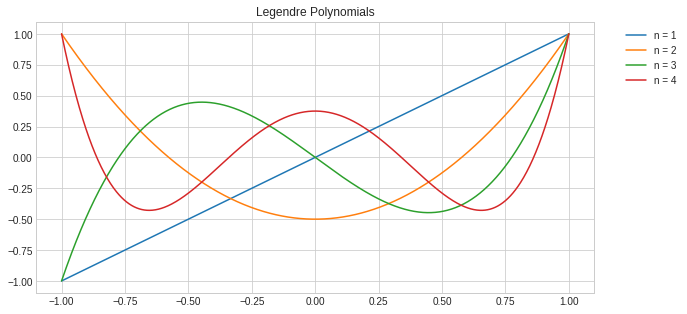

In [3]:
### x values
N = 1000
xvals = np.linspace(-1, 1, N)

plt.figure(figsize=(10,5)) 
for deg in range(1, 5):
    
    ### y values
    yvals = Legendre(xvals, deg)
    
    ### plot the polynomials
    plt.plot(xvals, yvals, label = "n = " + str(deg))

### set figure
plt.title("Legendre Polynomials")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

## Roots of Legendre Polynomials

**In Gauss-Lengendre Integration, the roots of Legendre poylnomials are acquired as nodes.**

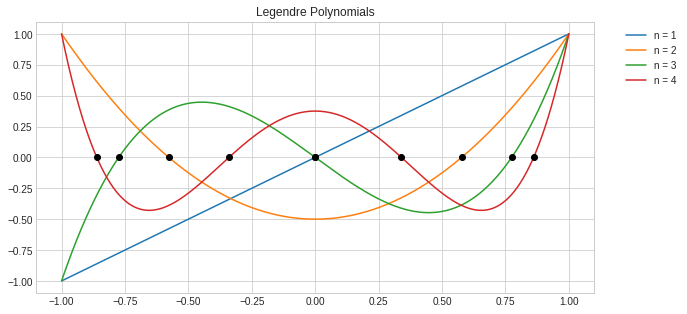

In [4]:
### x values
N = 1000
xvals = np.linspace(-1, 1, N)

plt.figure(figsize=(10,5)) 
for deg in range(1, 5):
    
    ### y values
    yvals = Legendre(xvals, deg)
    
    ### get roots
    roots, weights = legendre_np.leggauss(deg)
    zeros          = np.zeros(deg)
    
    ### plot the polynomials
    plt.plot(xvals, yvals, label = "n = " + str(deg))
    plt.plot(roots, zeros, 'ko')
    
### set figure
plt.title("Legendre Polynomials")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

## Gauss-Legendre Quadrature

$$\int_{x=a}^b f(x) dx \sim \sum_{i=1}^N w_i f(x_i)$$

where $a \leq x_1 \leq x_2 \leq \dots \leq x_N \leq b$

Therefore, we can set up a system of equations by expressing $f(x)$ by a basis of polynomials $p(x)$. The basis chosen here is $p(x) = x^i$

$$\begin{align} 
p(x) &= 1       \Rightarrow &            w_1  &+&           w_2  &+\dots+&            w_N &= \int_a^b        dx &=&             b - a       \\
p(x) &= x       \Rightarrow & x_1        w_1  &+& x_2       w_2  &+\dots+& x_N        w_N &= \int_a^b x      dx &=& \frac{1}{2} (b^3 - a^3) \\
p(x) &= x^2     \Rightarrow & x_1^2      w_1  &+& x_2^{3}   w_2  &+\dots+& x_N^{2}    w_N &= \int_a^b x^2    dx &=& \frac{1}{3} (b^3 - a^3) \\
p(x) &= x^3     \Rightarrow & x_1^3      w_1  &+& x_2^{3}   w_2  &+\dots+& x_N^{3}    w_N &= \int_a^b x^3    dx &=& \frac{1}{4} (b^3 - a^3) \\
\dots \\
p(x) &= x^{N-1} \Rightarrow & x_1^{N-1}  w_1  &+& x_2^{N-1} w_2  &+\dots+& x_N^{N-1}  w_N &= \int_a^b x^{N-1}dx &=& \frac{1}{N} (b^N - a^N) \\
\end{align}$$

The system of equations by be rewritten as follow

$$\begin{bmatrix}
1         & 1         & \dots & 1         \\
x_1       & x_2       & \dots & x_N       \\
\vdots    & \vdots    & \dots & \vdots    \\
x_1^{N-1} & x_2^{N-1} & \dots & x_N^{N-1} \\
\end{bmatrix} \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_N
\end{bmatrix} = \begin{bmatrix}
b - a \\
\frac{1}{2} (b^3 - a^3) \\
\vdots \\
\frac{1}{N} (b^N - a^N)
\end{bmatrix}$$

or

$$V^T w = y$$

where $V$ is the Vandermonde matrix

If $x_i$ are chosen uniquelly, the Vandermonde matrix will be non-singular and therefore, there will be unique solution for the weights $w$

### Create transpose Vandermonde matrix based on the roots of Legendre polynomials and solve for the weights

In [5]:
### degree
order = 5

### get roots
roots, weights = legendre_np.leggauss(order)

### Get the transpose of Vandermonde matrix
Vt = np.array([np.power(roots, deg) for deg in range(order)])

### get the integration of Legendre polynomials between (a,b)
a, b = -1, 1
y    = np.array([1/deg * (b**deg - a**deg) for deg in range(1, order+1)])

### solve the system of eq for the weights
ws = la.solve(Vt, y)

**Weights from solving the system of eq**

In [6]:
ws

array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689])

**Weights from the package**

In [7]:
weights

array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689])

In [8]:
np.allclose(ws, weights)

True

## Perform integration using Gauss-Legendre Quadrature

### Example 1: Integrate a function over [-1, 1]

$$\int_{x=-1}^1 (3x^2 + 1) dx = (x^3+x) \mid_{x=-1}^1 = 2 + 2 = 4$$

**Define function**

In [9]:
fun = lambda x: 3.0 * x**2 + 1

**Integration using Gauss-Lengendre Quadrature**

In [10]:
np.sum([w * fun(x) for w, x in zip(weights, roots)])

4.000000000000002

**Integration using Scipy, which also employed Gauss-Lengendre Quadrature**

In [11]:
# integral and estimate error
a, b     = -1, 1
ing, err = quad(fun, a, b)
print(ing)

3.999999999999999


-----

### Example 2: Integrate a function over [-1, 1]

**Define function**

In [12]:
fun = lambda x: np.cos(x) + np.sin(x)

**Integration using Gauss-Lengendre Quadrature**

In [13]:
np.sum([w * fun(x) for w, x in zip(weights, roots)])

1.682941970407192

**Integration using Scipy, which also employed Gauss-Lengendre Quadrature**

In [14]:
# integral and estimate error
a, b     = -1, 1
ing, err = quad(fun, a, b)
print(ing)

1.682941969615793


-----

### Example 3: Integrate over region other than [-1, 1]

find new nodes by transformation of the roots

$-1 \leq \hat{x} \leq 1$

$a \leq x \leq b$

if 

$$\frac{\hat{x} - (-1)}{1 - (-1)} = \frac{x - a}{b - a}$$

$\Rightarrow$

$$x = \frac{b-a}{2} \hat{x} + \frac{a+b}{2} = h \hat{x} + c$$

where $$h = \frac{b-a}{2}; c = \frac{b+a}{2}$$

$\Rightarrow$

$$\begin{align}
\int_{x=a}^b f(x) dx &= \int_{\hat{x}=-1}^1 f(h \hat{x} + c) \frac{dx}{d\hat{x}} d\hat{x}
\end{align}$$

-----

$$\begin{align}
\int_{x=a}^b f(x) dx
&= \int_{\hat{x}=-1}^1 f(h \hat{x} + c) \frac{dx}{d\hat{x}} d\hat{x} \\
&= \int_{\hat{x}=-1}^1 f(h \hat{x} + c) h d\hat{x} \\
&= h \int_{\hat{x}=-1}^1 f(h \hat{x} + c) d\hat{x} \\
&\sim h \sum_{i=1}^N w_i f(h \hat{x}_i + c)
\end{align}$$

**Define a function**

In [15]:
fun = lambda x: np.exp(x)

**Transformation of roots to new nodes for region (a, b)**

In [16]:
a, b  = -1, 5
h     = (b-a) / 2
c     = (b+a) / 2
nodes = roots * h + c

**The weights calculated can be reused for integrating a function over a new regions**

In [17]:
h * np.sum([w * fun(x) for w, x in zip(weights, nodes)])

148.044007735636

**Double check the results using Scipy**

In [18]:
### double check using Scipy
a, b  = -1, 5
ing, err = quad(fun, a, b)
print(ing)

148.04527966140515


**We can also recalculate new weights based on new nodes, which is unnecessary if we want the algorithm to be efficient (that is, we do not want to keep solving another system of equations)**

In [19]:
### Get the transpose of Vandermonde matrix
Vt = np.array([np.power(nodes, deg) for deg in range(order)])

### get the integration of Legendre polynomials between (a,b)
a, b = -1, 5
y    = np.array([1/deg * (b**deg - a**deg) for deg in range(1, order+1)])

### solve the system of eq for the weights
ws = la.solve(Vt, y)

**Gauss-Lengendre Quadrature using new weights**

In [20]:
np.sum([w * fun(x) for w, x in zip(ws, nodes)])

148.04400773563577